<h1 align="center"><font size = 8>Machine Learning | 2024 </font></h1>
<br>
<h2 align="center"><font size = 6  color="darkblue"> K-means Clustering </font></h2>
<h3 align="center">Abdulrahman Nourzad</h3>
<h4 align="center">Master's in Computer Software Engineering & Post DBA in Business Intelligence</h4>
<br>
<hr>
<br>

### KMeans Clustering
- **K-Means Clustering** is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.

- **Unsupervised Machine Learning** is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations. 

- **K-means clustering**, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster.

# Part 01: Scratch

## 1. Import Libraries

In [1]:
import math
import numpy as np
import pandas as pd
np.random.seed(123)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Read Data

In [2]:
data=pd.read_csv('Data.csv')

In [3]:
data.head()

,x,y
0,-0.542,23.761
1,8.129,25.661
2,4.239,25.298
3,-0.691,25.230
4,3.539,21.645


In [4]:
data.shape

(60, 2)

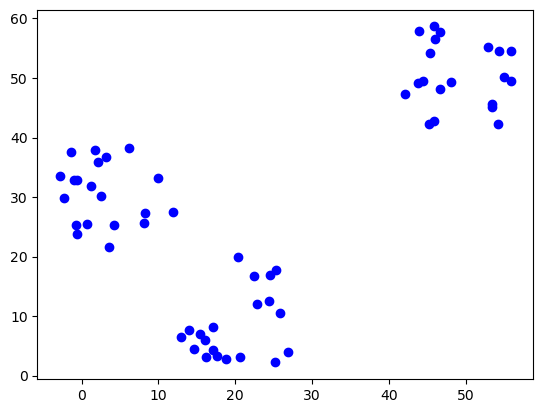

In [5]:
plt.scatter(data['x'], data['y'], c='b')
plt.show()

## 3. initialization centroids

In [6]:
def initial_cent(k, data):
    
    n = data.shape[1]
    
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    
    centroids = []
    
    for cent in range(k):
        cent = np.random.uniform(centroid_min, centroid_max, n)
        centroids.append(cent)
    
    centroids = pd.DataFrame(centroids, columns=data.columns)
    
    return centroids

In [7]:
centroids = initial_cent(3, data)
centroids

,x,y
0,39.996300,14.777837
1,11.134063,31.075254
2,41.409843,23.195700


## 4. Calculate the sum of squared errors

In [8]:
def cal_error(a, b):
    error = np.square(np.sum((a-b)**2))
    
    return error

In [9]:
errors = np.array([])

for cent in range(centroids.shape[0]):
    error = cal_error(centroids.iloc[cent, :], data.iloc[0, :])
    
    errors = np.append(errors, error)

In [10]:
errors

array([2972351.68265223,   36034.96413044, 3098574.16619018])

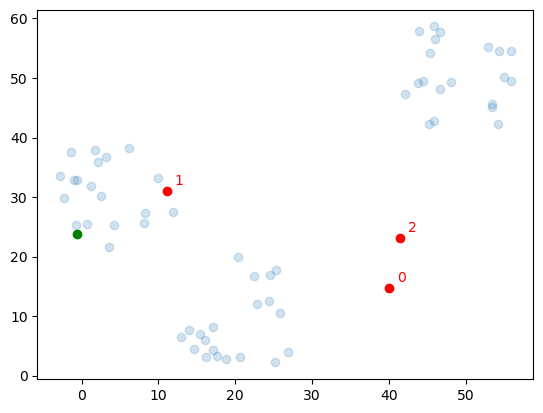

In [11]:
plt.scatter(data.iloc[1:,0], data.iloc[1:,1],  marker = 'o', alpha = 0.2)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', c = 'r')
plt.scatter(data.iloc[0,0], data.iloc[0,1],  marker = 'o', c = 'g')



for i in range(centroids.shape[0]):
    plt.text(centroids.iloc[i,0]+1, centroids.iloc[i,1]+1, s = centroids.index[i], c = 'r')

## 5. Assign a centroid to each of the observations

In [12]:
def assign_cent(data, centroids):
    
    m = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]
    
    for x in range(m):
        errors = np.array([])
        
        for cent in range(k):
            error = cal_error(centroids.iloc[cent, :2], data.iloc[x, :2])
            errors = np.append(errors, error)
        
        closet_cent = np.where(errors == np.min(errors))[0].tolist()[0]
        centroid_error = np.min(errors)
        
        centroid_assign.append(closet_cent)
        centroid_errors.append(centroid_error)
        
    return(centroid_assign, centroid_errors)

In [13]:
data['centroid'], data['error'] = assign_cent(data.iloc[:, :2], centroids)

data[['centroid', 'error']].head()

,centroid,error
0,1,36034.964130
1,1,1470.305065
2,1,6547.814773
3,1,30275.695617
4,1,21495.866518


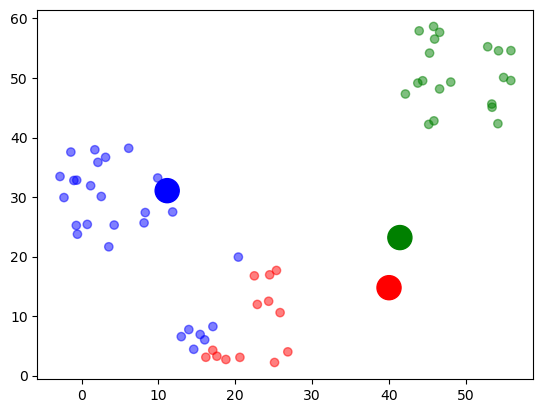

In [14]:
colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)

plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

plt.show()

## 6. Calculate the sum of total errors

In [15]:
data['error'].sum()

21382270.708532356

## 7. Recalculate the position of the centroids

In [16]:
data_columns = ['x', 'y']

centroids = data.groupby('centroid').mean().loc[:, data_columns].reset_index(drop=True)

centroids

,x,y
0,22.112000,8.391077
1,6.094926,24.894370
2,48.898800,50.526050


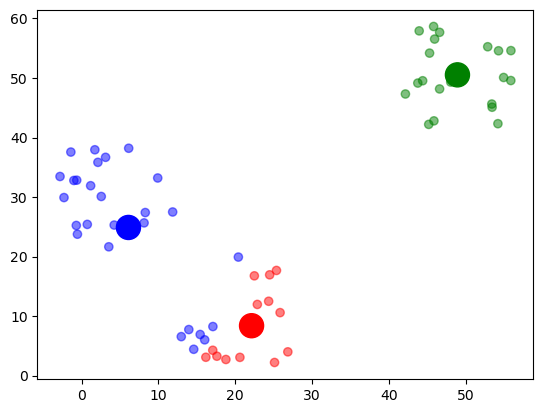

In [17]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

plt.show()

## 8. K-Means

In [18]:
def kmeans(data, k):
    centroids = initial_cent(k, data)
    error = []
    compr = True
    i = 0
    
    while(compr):
        data['centroid'], iter_error = assign_cent(data, centroids)
        error.append(sum(iter_error))
        
        centroids = data.groupby('centroid').agg('mean').reset_index(drop=True)
        
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i], 3) != round(error[i-1], 3)):
                compr = True
            else:
                compr = False
        i = i+1
        
        data['centroid'], iter_error = assign_cent(data, centroids)
        iter_error = sum(iter_error)
        
        centroids = data.groupby('centroid').mean().reset_index(drop=True)
        return (data['centroid'], iter_error, centroids)

In [19]:
data['centroid'], _, centroids= kmeans(data.drop(['centroid', 'error'], axis=1), 3)

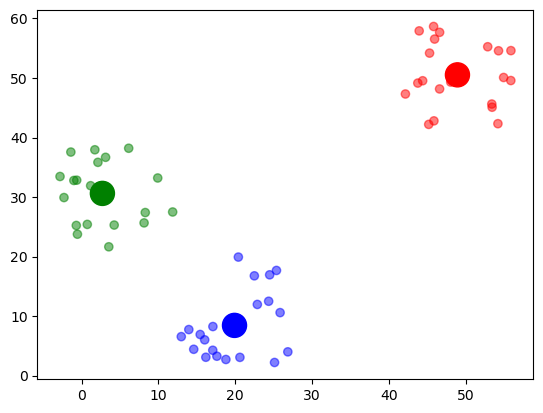

In [20]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

plt.show()

## 9. elbow

In [21]:
total_errors = []
n = 10

for i in range(n):
    _, it_error, _=kmeans(data.drop(['centroid', 'error'], axis=1), i+1)
    total_errors.append(it_error)

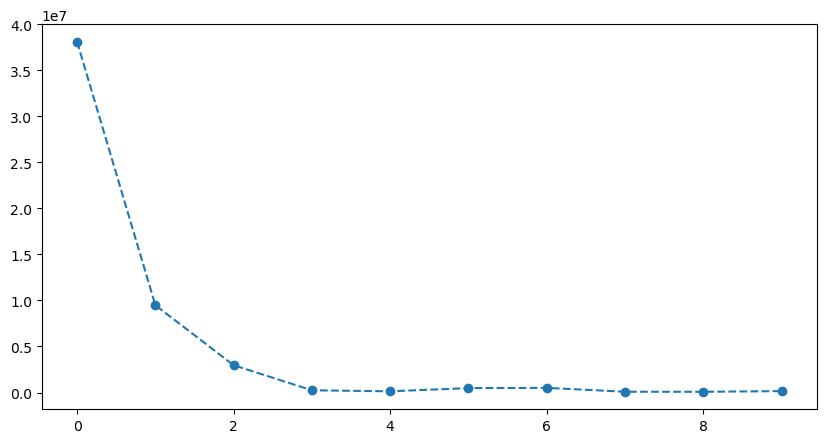

In [22]:
plt.figure(figsize=(10,5))
plt.plot(total_errors, 'o--')
plt.show()

# Part 02: K-Means -------> sklearn.cluster.KMeans

In [23]:
X = pd.read_csv('Data.csv')

In [24]:
model = KMeans(n_clusters=2)

In [25]:
cluster_lab = model.fit_predict(X)

In [26]:
X['cluster_lab'] = cluster_lab

In [27]:
X.head()

,x,y,cluster_lab
0,-0.542,23.761,0
1,8.129,25.661,0
2,4.239,25.298,0
3,-0.691,25.230,0
4,3.539,21.645,0


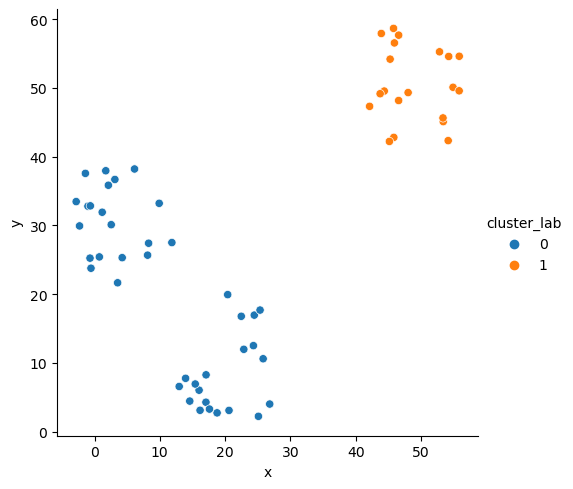

In [28]:
sns.relplot(x="x", y="y", hue="cluster_lab", data=X)
plt.show()

In [29]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    
    model.fit(X.drop('cluster_lab', axis=1))
    
    ssd.append(model.inertia_)

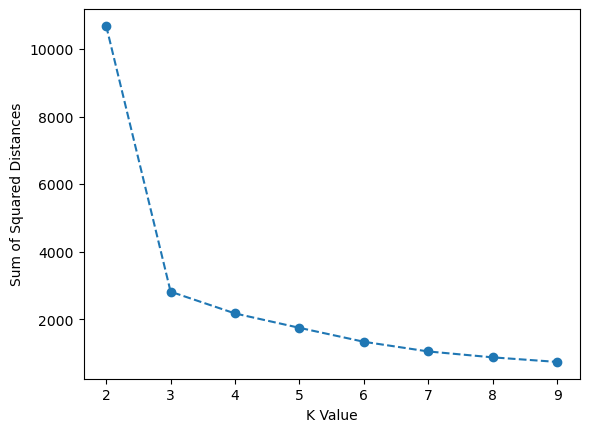

In [30]:
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')

plt.show()

**Result:** the best k = 3 

### Final Clusters

In [31]:
Data = pd.read_csv('Data.csv')

In [32]:
model_final = KMeans(n_clusters=3)

In [33]:
cluster_lab = model_final.fit_predict(Data)

In [34]:
Data['cluster_Group'] = cluster_lab
Data.head()

,x,y,cluster_Group
0,-0.542,23.761,2
1,8.129,25.661,2
2,4.239,25.298,2
3,-0.691,25.230,2
4,3.539,21.645,2


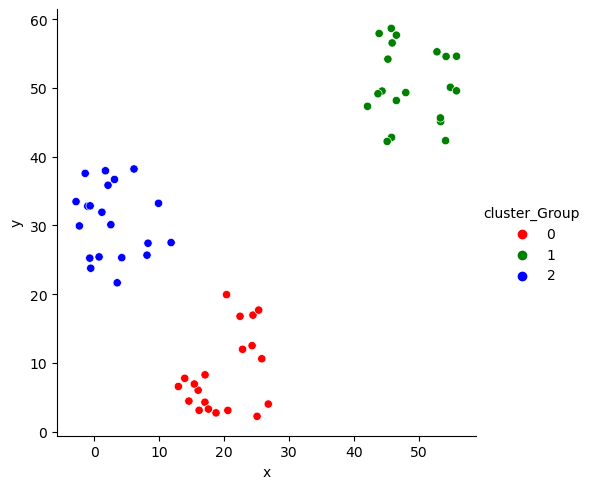

In [35]:
sns.relplot(x="x", y="y", hue="cluster_Group", data=Data, palette=['r', 'g', 'b'])
plt.show()

### Well done! 
**Nourzad**